In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [24]:

#read the reviews and their polarities from a given file
def loadData(fname):
    reviews=[]
    labels=[]
    f=open(fname)
    for line in f:
        review,rating=line.strip().split('\t')  
        reviews.append(review.lower())    
        labels.append(int(rating))
    f.close()
    return reviews,labels


In [25]:
X_train,y_train=loadData('reviews_train.txt')
X_test,y_test=loadData('reviews_test.txt')

counter = CountVectorizer()
counter.fit(rev_train)


X_train = counter.transform(rev_train)
X_test = counter.transform(rev_test)

DecisionTree
{'max_depth': 7, 'min_samples_split': 5}
KNeighbors
{'n_neighbors': 9, 'weights': 'distance'}
RandomForest
{'max_depth': None, 'n_estimators': 200}
XGB
{'max_depth': 3, 'n_estimators': 200}
GradientBoosting
{'learning_rate': 0.2, 'n_estimators': 200}
Accuracy: 0.8733333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       148
           1       0.85      0.91      0.88       152

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



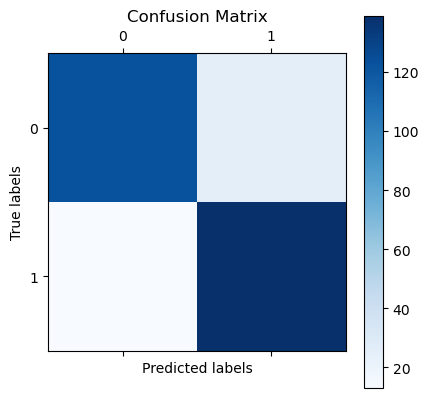

In [26]:


# Define the classifiers and their parameter grids
classifiers = [
    ('DecisionTree', DecisionTreeClassifier(), {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]}),
    ('KNeighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}),
    ('RandomForest', RandomForestClassifier(), {'n_estimators': [100,200, 300, 400, 500], 'max_depth': [None, 3, 5]}),
    ('XGB', XGBClassifier(use_label_encoder=False), {'n_estimators': [100,200, 300, 400, 500], 'max_depth': [None, 3, 5]}),
    ('GradientBoosting', GradientBoostingClassifier(), {'n_estimators': [100,200, 300, 400, 500], 'learning_rate': [0.1, 0.2]})
]

optimized_classifiers = []

# Perform Grid Search for each classifier
for name, classifier, params in classifiers:
    grid = GridSearchCV(classifier, params, scoring='accuracy', n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(name)
    print(best_params)
    optimized_classifier = classifier.set_params(**best_params)
    optimized_classifiers.append((name, optimized_classifier))

# Create a Voting Classifier using optimized classifiers
voting_clf = VotingClassifier(optimized_classifiers, voting='hard')

# Train the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier on the test data
y_pred = voting_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.matshow(conf_mat, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()
